## Preprocessing

In [ ]:
# Import the required modules
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split

# Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# tensorflow
import tensorflow as tf

# Metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#  Import and read the charity_data.csv.
df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   EIN                     34299 non-null  int64 
 1   NAME                    34299 non-null  object
 2   APPLICATION_TYPE        34299 non-null  object
 3   AFFILIATION             34299 non-null  object
 4   CLASSIFICATION          34299 non-null  object
 5   USE_CASE                34299 non-null  object
 6   ORGANIZATION            34299 non-null  object
 7   STATUS                  34299 non-null  int64 
 8   INCOME_AMT              34299 non-null  object
 9   SPECIAL_CONSIDERATIONS  34299 non-null  object
 10  ASK_AMT                 34299 non-null  int64 
 11  IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 3.1+ MB


In [ ]:
df.describe()

,EIN,STATUS,ASK_AMT,IS_SUCCESSFUL
count,3.429900e+04,34299.000000,3.429900e+04,34299.000000
mean,5.191852e+08,0.999854,2.769199e+06,0.532406
std,2.451472e+08,0.012073,8.713045e+07,0.498956
min,1.052060e+07,0.000000,5.000000e+03,0.000000
25%,2.748482e+08,1.000000,5.000000e+03,0.000000
50%,4.656317e+08,1.000000,5.000000e+03,1.000000
75%,7.526117e+08,1.000000,7.742000e+03,1.000000
max,9.960869e+08,1.000000,8.597806e+09,1.000000


In [ ]:
df.IS_SUCCESSFUL.value_counts()

1    18261
0    16038
Name: IS_SUCCESSFUL, dtype: int64

In [ ]:
# To Do List:

# Drop the EIN and Name columns (they are IDs and non-predictive)
# NO nulls!

# FIX the Categories
# LOOK at how many values per column exist
# BUCKET lower ones into an "Other"

# OneHotEncode Categories
# Scale the Numeric (or all) - I wouldn't do this but.. grades

# DO machine learning

In [ ]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
df2 = df.copy()

df2 = df2.drop(["EIN", "NAME"], axis=1)
df2.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [ ]:
# Determine the number of unique values in each column.
df2.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [ ]:
# Application_Type & Classification are only ones over ten (Ask Amt is not categorical)

In [ ]:
# Look at APPLICATION_TYPE value counts for binning
df2.APPLICATION_TYPE.value_counts()

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [ ]:
df2['APPLICATION_TYPE'].value_counts() < 500

T3     False
T4     False
T6     False
T5     False
T19    False
T8     False
T7     False
T10    False
T9      True
T13     True
T12     True
T2      True
T25     True
T14     True
T29     True
T15     True
T17     True
Name: APPLICATION_TYPE, dtype: bool

In [ ]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = ["T9", "T13", "T12", "T2", "T25", "T14", "T29", "T15", "T17"]

# Replace in dataframe
for app in application_types_to_replace:
    df2['APPLICATION_TYPE'] = df2['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
df2['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [ ]:
# Look at CLASSIFICATION value counts for binning
df2['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [ ]:
# You may find it helpful to look at CLASSIFICATION value counts >1
df2['CLASSIFICATION'].value_counts().loc[df2['CLASSIFICATION'].value_counts() > 1]

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: CLASSIFICATION, dtype: int64

In [ ]:
df2['CLASSIFICATION'].value_counts().loc[df2['CLASSIFICATION'].value_counts() < 700].index

Index(['C1700', 'C4000', 'C5000', 'C1270', 'C2700', 'C2800', 'C7100', 'C1300',
       'C1280', 'C1230', 'C1400', 'C7200', 'C2300', 'C1240', 'C8000', 'C7120',
       'C1500', 'C1800', 'C6000', 'C1250', 'C8200', 'C1238', 'C1278', 'C1235',
       'C1237', 'C7210', 'C2400', 'C1720', 'C4100', 'C1257', 'C1600', 'C1260',
       'C2710', 'C0', 'C3200', 'C1234', 'C1246', 'C1267', 'C1256', 'C2190',
       'C4200', 'C2600', 'C5200', 'C1370', 'C1248', 'C6100', 'C1820', 'C1900',
       'C1236', 'C3700', 'C2570', 'C1580', 'C1245', 'C2500', 'C1570', 'C1283',
       'C2380', 'C1732', 'C1728', 'C2170', 'C4120', 'C8210', 'C2561', 'C4500',
       'C2150'],
      dtype='object')

In [ ]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = list(df2['CLASSIFICATION'].value_counts().loc[df2['CLASSIFICATION'].value_counts() < 700].index)

# Replace in dataframe
for cls in classifications_to_replace:
    df2['CLASSIFICATION'] = df2['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure binning was successful
df2['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1484
C7000      777
Name: CLASSIFICATION, dtype: int64

In [ ]:
# Convert categorical data to numeric with `pd.get_dummies`
df2 = pd.get_dummies(df2)
df2.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Other,AFFILIATION_Regional,CLASSIFICATION_C1000,CLASSIFICATION_C1200,CLASSIFICATION_C2000,CLASSIFICATION_C2100,CLASSIFICATION_C3000,CLASSIFICATION_C7000,CLASSIFICATION_Other,USE_CASE_CommunityServ,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0


In [ ]:
# Split our preprocessed data into our features and target arrays
X = df2.drop("IS_SUCCESSFUL", axis=1)
y = df2.IS_SUCCESSFUL

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)

print(X_train.shape)
print(X_test.shape)

(25724, 44)
(8575, 44)


In [ ]:
len(X.columns)

44

In [ ]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [ ]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

nn1 = tf.keras.models.Sequential()

# Add our first Dense layer, including the input layer
nn1.add(tf.keras.layers.Dense(units=5, activation="relu", input_dim=len(X.columns))) # we have 44 features

# Add a second layer
nn1.add(tf.keras.layers.Dense(units=3, activation="relu"))

# Add the output layer that uses a probability activation function
nn1.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the Sequential model
nn1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 225       
                                                                 
 dense_1 (Dense)             (None, 3)                 18        
                                                                 
 dense_2 (Dense)             (None, 1)                 4         
                                                                 
Total params: 247 (988.00 Byte)
Trainable params: 247 (988.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compile the Sequential model together and customize metrics
nn1.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
fit_model = nn1.fit(X_train_scaled, y_train, epochs=500)

Epoch 1/500
804/804 [==============================] - 3s 2ms/step - loss: 0.6512 - accuracy: 0.6354
Epoch 2/500
804/804 [==============================] - 2s 2ms/step - loss: 0.6067 - accuracy: 0.7037
Epoch 3/500
804/804 [==============================] - 2s 3ms/step - loss: 0.5837 - accuracy: 0.7231
Epoch 4/500
804/804 [==============================] - 2s 2ms/step - loss: 0.5762 - accuracy: 0.7260
Epoch 5/500
804/804 [==============================] - 2s 2ms/step - loss: 0.5729 - accuracy: 0.7266
Epoch 6/500
804/804 [==============================] - 2s 2ms/step - loss: 0.5696 - accuracy: 0.7281
Epoch 7/500
804/804 [==============================] - 2s 2ms/step - loss: 0.5669 - accuracy: 0.7279
Epoch 8/500
804/804 [==============================] - 2s 2ms/step - loss: 0.5655 - accuracy: 0.7298
Epoch 9/500
804/804 [==============================] - 2s 2ms/step - loss: 0.5646 - accuracy: 0.7289
Epoch 10/500
804/804 [==============================] - 3s 3ms/step - loss: 0.5640 - accura

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn1.evaluate(X_test_scaled, y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5584 - accuracy: 0.7252 - 498ms/epoch - 2ms/step
Loss: 0.5584184527397156, Accuracy: 0.7252478003501892


In [ ]:
def doClassification_NN(nn_model, X_train, X_test, y_train, y_test):
    # predict
    train_preds = nn_model.predict(X_train)
    train_preds = tf.greater(train_preds, .5)
    train_probs = nn_model.predict(X_train)

    test_preds = nn_model.predict(X_test)
    test_preds = tf.greater(test_preds, .5)
    test_probs = nn_model.predict(X_test)

    # evaluate train
    train_cr = classification_report(y_train, train_preds)
    train_cm = confusion_matrix(y_train, train_preds)

    train_report = f"""
    Train Confusion Matrix:
    {train_cm}

    Train Report:
    {train_cr}
    """
    print("TRAINING METRICS")
    print(train_report)
    print()

    # train ROC curve
    # Compute fpr, tpr, thresholds and roc auc
    fpr, tpr, thresholds = roc_curve(y_train, train_probs)
    roc_auc = roc_auc_score(y_train, train_probs)

    # Plot ROC curve
    plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('TRAINING Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
    print()
    print()

    # evaluate test
    test_cr = classification_report(y_test, test_preds)
    test_cm = confusion_matrix(y_test, test_preds)

    test_report = f"""
    Test Confusion Matrix:
    {test_cm}

    Test Report:
    {test_cr}
    """
    print("TESTING METRICS")
    print(test_report)
    print()

    # train ROC curve
    # Compute fpr, tpr, thresholds and roc auc
    fpr, tpr, thresholds = roc_curve(y_test, test_probs)
    roc_auc = roc_auc_score(y_test, test_probs)

    # Plot ROC curve
    plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('TESTING Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

268/268 [==============================] - 0s 1ms/step
TRAINING METRICS

    Train Confusion Matrix:
    [[ 8137  3908]
 [ 2933 10746]]

    Train Report:
                  precision    recall  f1-score   support

           0       0.74      0.68      0.70     12045
           1       0.73      0.79      0.76     13679

    accuracy                           0.73     25724
   macro avg       0.73      0.73      0.73     25724
weighted avg       0.73      0.73      0.73     25724

    



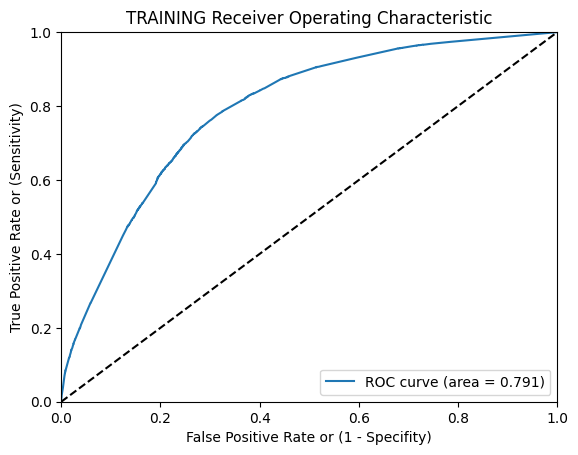



TESTING METRICS

    Test Confusion Matrix:
    [[2664 1329]
 [1027 3555]]

    Test Report:
                  precision    recall  f1-score   support

           0       0.72      0.67      0.69      3993
           1       0.73      0.78      0.75      4582

    accuracy                           0.73      8575
   macro avg       0.72      0.72      0.72      8575
weighted avg       0.73      0.73      0.72      8575

    



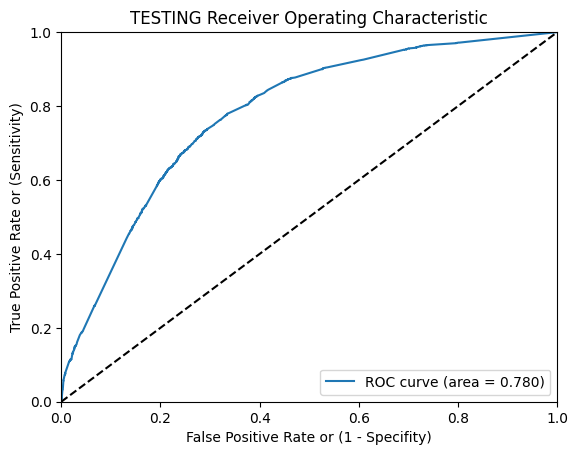

In [ ]:
doClassification_NN(nn1, X_train_scaled, X_test_scaled, y_train, y_test)

In [ ]:
# Export our model to HDF5 file
nn1.save("nn1.h5")

In [ ]:
# OPTIMIZATIONS

In [ ]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

nn2 = tf.keras.models.Sequential()

# Add our first Dense layer, including the input layer
nn2.add(tf.keras.layers.Dense(units=15, activation="relu", input_dim=len(X.columns))) # we have 44 features

# Add a second layer
nn2.add(tf.keras.layers.Dense(units=7, activation="relu"))

# Add a third layer
nn2.add(tf.keras.layers.Dense(units=5, activation="relu"))

# Add the output layer that uses a probability activation function
nn2.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the Sequential model
nn2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 15)                675       
                                                                 
 dense_4 (Dense)             (None, 7)                 112       
                                                                 
 dense_5 (Dense)             (None, 5)                 40        
                                                                 
 dense_6 (Dense)             (None, 1)                 6         
                                                                 
Total params: 833 (3.25 KB)
Trainable params: 833 (3.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compile the Sequential model together and customize metrics
nn2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
fit_model = nn2.fit(X_train_scaled, y_train, epochs=500)

Epoch 1/500
804/804 [==============================] - 3s 2ms/step - loss: 0.6033 - accuracy: 0.6978
Epoch 2/500
804/804 [==============================] - 2s 2ms/step - loss: 0.5591 - accuracy: 0.7274
Epoch 3/500
804/804 [==============================] - 2s 2ms/step - loss: 0.5553 - accuracy: 0.7294
Epoch 4/500
804/804 [==============================] - 2s 3ms/step - loss: 0.5530 - accuracy: 0.7299
Epoch 5/500
804/804 [==============================] - 2s 3ms/step - loss: 0.5515 - accuracy: 0.7308
Epoch 6/500
804/804 [==============================] - 2s 2ms/step - loss: 0.5509 - accuracy: 0.7299
Epoch 7/500
804/804 [==============================] - 2s 2ms/step - loss: 0.5499 - accuracy: 0.7314
Epoch 8/500
804/804 [==============================] - 2s 2ms/step - loss: 0.5492 - accuracy: 0.7321
Epoch 9/500
804/804 [==============================] - 2s 2ms/step - loss: 0.5490 - accuracy: 0.7307
Epoch 10/500
804/804 [==============================] - 2s 2ms/step - loss: 0.5484 - accura

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn2.evaluate(X_test_scaled, y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5588 - accuracy: 0.7303 - 455ms/epoch - 2ms/step
Loss: 0.5587671995162964, Accuracy: 0.7302623987197876


268/268 [==============================] - 0s 1ms/step
TRAINING METRICS

    Train Confusion Matrix:
    [[ 8012  4033]
 [ 2657 11022]]

    Train Report:
                  precision    recall  f1-score   support

           0       0.75      0.67      0.71     12045
           1       0.73      0.81      0.77     13679

    accuracy                           0.74     25724
   macro avg       0.74      0.74      0.74     25724
weighted avg       0.74      0.74      0.74     25724

    



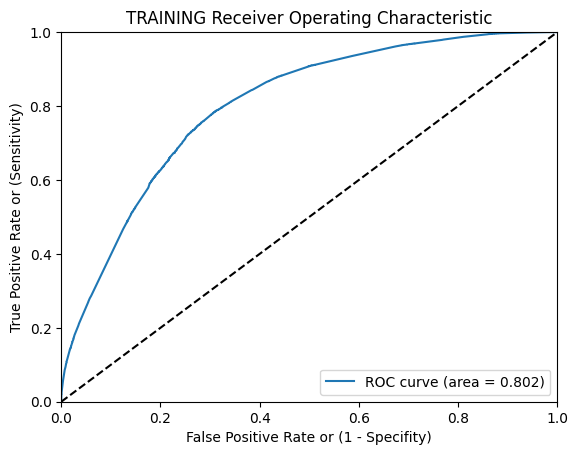



TESTING METRICS

    Test Confusion Matrix:
    [[2611 1382]
 [ 931 3651]]

    Test Report:
                  precision    recall  f1-score   support

           0       0.74      0.65      0.69      3993
           1       0.73      0.80      0.76      4582

    accuracy                           0.73      8575
   macro avg       0.73      0.73      0.73      8575
weighted avg       0.73      0.73      0.73      8575

    



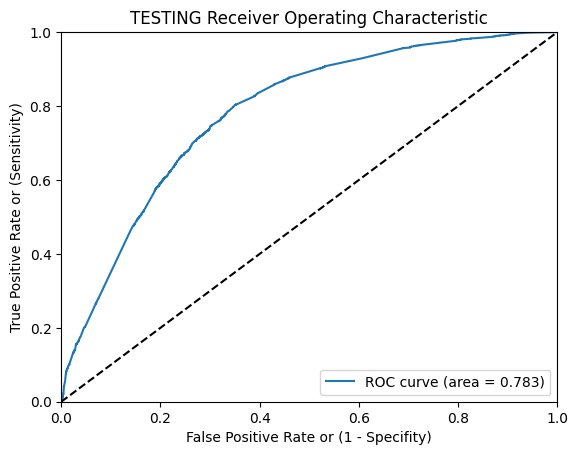

In [ ]:
doClassification_NN(nn2, X_train_scaled, X_test_scaled, y_train, y_test)

In [ ]:
def doClassification(model, X_train, X_test, y_train, y_test):
    # predict
    train_preds = model.predict(X_train)
    train_probs = model.predict_proba(X_train)

    test_preds = model.predict(X_test)
    test_probs = model.predict_proba(X_test)

    # evaluate train
    train_cr = classification_report(y_train, train_preds)
    train_cm = confusion_matrix(y_train, train_preds)

    train_report = f"""
    Train Confusion Matrix:
    {train_cm}

    Train Report:
    {train_cr}
    """
    print("TRAINING METRICS")
    print(train_report)
    print()

    # train ROC curve
    # Compute fpr, tpr, thresholds and roc auc
    fpr, tpr, thresholds = roc_curve(y_train, train_probs[:,1])
    roc_auc = roc_auc_score(y_train, train_probs[:,1])

    # Plot ROC curve
    plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('TRAINING Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
    print()
    print()

    # evaluate test
    test_cr = classification_report(y_test, test_preds)
    test_cm = confusion_matrix(y_test, test_preds)

    test_report = f"""
    Test Confusion Matrix:
    {test_cm}

    Test Report:
    {test_cr}
    """
    print("TESTING METRICS")
    print(test_report)
    print()

    # train ROC curve
    # Compute fpr, tpr, thresholds and roc auc
    fpr, tpr, thresholds = roc_curve(y_test, test_probs[:,1])
    roc_auc = roc_auc_score(y_test, test_probs[:,1])

    # Plot ROC curve
    plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('TESTING Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
# Export our model to HDF5 file
nn2.save("nn2.h5")

In [ ]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

nn3 = tf.keras.models.Sequential()

# Add our first Dense layer, including the input layer
nn3.add(tf.keras.layers.Dense(units=21, activation="relu", input_dim=len(X.columns))) # we have 44 features

# Add a second layer
nn3.add(tf.keras.layers.Dense(units=15, activation="relu"))

# Add a third layer
nn3.add(tf.keras.layers.Dense(units=9, activation="relu"))

# Add the output layer that uses a probability activation function
nn3.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the Sequential model
nn3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 21)                945       
                                                                 
 dense_8 (Dense)             (None, 15)                330       
                                                                 
 dense_9 (Dense)             (None, 9)                 144       
                                                                 
 dense_10 (Dense)            (None, 1)                 10        
                                                                 
Total params: 1429 (5.58 KB)
Trainable params: 1429 (5.58 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compile the Sequential model together and customize metrics
nn3.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
fit_model = nn3.fit(X_train_scaled, y_train, epochs=500)

Epoch 1/500
804/804 [==============================] - 8s 6ms/step - loss: 0.5818 - accuracy: 0.7131
Epoch 2/500
804/804 [==============================] - 6s 8ms/step - loss: 0.5562 - accuracy: 0.7274
Epoch 3/500
804/804 [==============================] - 3s 4ms/step - loss: 0.5525 - accuracy: 0.7284
Epoch 4/500
804/804 [==============================] - 3s 4ms/step - loss: 0.5503 - accuracy: 0.7305
Epoch 5/500
804/804 [==============================] - 4s 5ms/step - loss: 0.5493 - accuracy: 0.7309
Epoch 6/500
804/804 [==============================] - 2s 2ms/step - loss: 0.5479 - accuracy: 0.7320
Epoch 7/500
804/804 [==============================] - 2s 2ms/step - loss: 0.5477 - accuracy: 0.7315
Epoch 8/500
804/804 [==============================] - 2s 2ms/step - loss: 0.5465 - accuracy: 0.7325
Epoch 9/500
804/804 [==============================] - 2s 2ms/step - loss: 0.5462 - accuracy: 0.7324
Epoch 10/500
804/804 [==============================] - 2s 2ms/step - loss: 0.5458 - accura

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn3.evaluate(X_test_scaled, y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5705 - accuracy: 0.7257 - 462ms/epoch - 2ms/step
Loss: 0.5705127120018005, Accuracy: 0.7257142663002014


268/268 [==============================] - 0s 1ms/step
TRAINING METRICS

    Train Confusion Matrix:
    [[ 8322  3723]
 [ 2913 10766]]

    Train Report:
                  precision    recall  f1-score   support

           0       0.74      0.69      0.71     12045
           1       0.74      0.79      0.76     13679

    accuracy                           0.74     25724
   macro avg       0.74      0.74      0.74     25724
weighted avg       0.74      0.74      0.74     25724

    



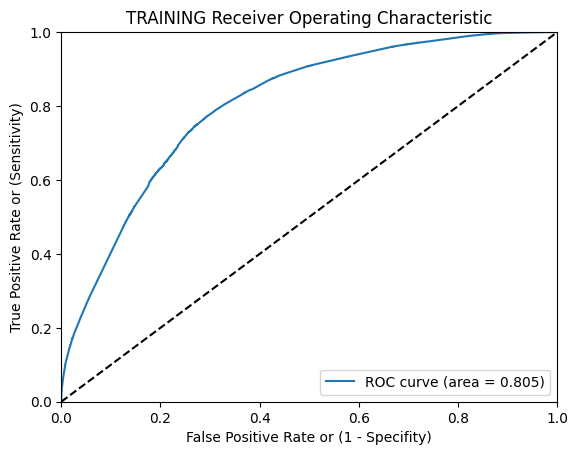



TESTING METRICS

    Test Confusion Matrix:
    [[2693 1300]
 [1052 3530]]

    Test Report:
                  precision    recall  f1-score   support

           0       0.72      0.67      0.70      3993
           1       0.73      0.77      0.75      4582

    accuracy                           0.73      8575
   macro avg       0.72      0.72      0.72      8575
weighted avg       0.73      0.73      0.72      8575

    



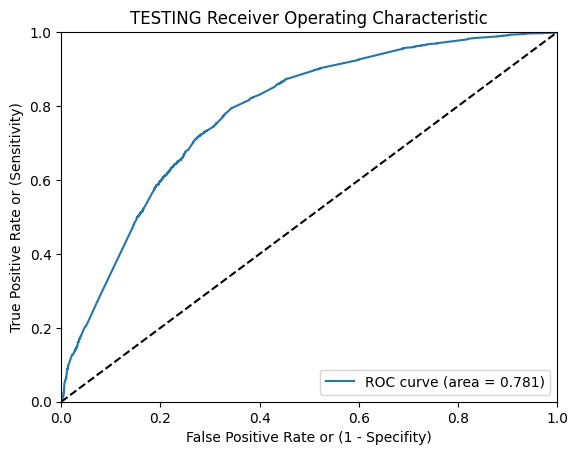

In [ ]:
doClassification_NN(nn3, X_train_scaled, X_test_scaled, y_train, y_test)

In [ ]:
# Export our model to HDF5 file
nn3.save("nn3.h5")

In [ ]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

nn4 = tf.keras.models.Sequential()

# Add our first Dense layer, including the input layer
nn4.add(tf.keras.layers.Dense(units=30, activation="relu", input_dim=len(X.columns))) # we have 44 features

# Add a second layer
nn4.add(tf.keras.layers.Dense(units=25, activation="relu"))

# Add a third layer
nn4.add(tf.keras.layers.Dense(units=15, activation="relu"))

# Add the output layer that uses a probability activation function
nn4.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the Sequential model
nn4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 30)                1350      
                                                                 
 dense_16 (Dense)            (None, 25)                775       
                                                                 
 dense_17 (Dense)            (None, 15)                390       
                                                                 
 dense_18 (Dense)            (None, 1)                 16        
                                                                 
Total params: 2531 (9.89 KB)
Trainable params: 2531 (9.89 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compile the Sequential model together and customize metrics
nn4.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
fit_model = nn4.fit(X_train_scaled, y_train, epochs=500)

Epoch 1/500
804/804 [==============================] - 3s 2ms/step - loss: 0.5755 - accuracy: 0.7130
Epoch 2/500
804/804 [==============================] - 2s 3ms/step - loss: 0.5538 - accuracy: 0.7269
Epoch 3/500
804/804 [==============================] - 2s 3ms/step - loss: 0.5511 - accuracy: 0.7292
Epoch 4/500
804/804 [==============================] - 2s 2ms/step - loss: 0.5492 - accuracy: 0.7305
Epoch 5/500
804/804 [==============================] - 2s 2ms/step - loss: 0.5487 - accuracy: 0.7297
Epoch 6/500
804/804 [==============================] - 2s 2ms/step - loss: 0.5471 - accuracy: 0.7303
Epoch 7/500
804/804 [==============================] - 2s 2ms/step - loss: 0.5463 - accuracy: 0.7322
Epoch 8/500
804/804 [==============================] - 2s 3ms/step - loss: 0.5457 - accuracy: 0.7318
Epoch 9/500
804/804 [==============================] - 2s 3ms/step - loss: 0.5450 - accuracy: 0.7329
Epoch 10/500
804/804 [==============================] - 2s 2ms/step - loss: 0.5447 - accura

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn4.evaluate(X_test_scaled, y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5702 - accuracy: 0.7293 - 483ms/epoch - 2ms/step
Loss: 0.570168137550354, Accuracy: 0.7293294668197632


268/268 [==============================] - 0s 1ms/step
TRAINING METRICS

    Train Confusion Matrix:
    [[ 8190  3855]
 [ 2763 10916]]

    Train Report:
                  precision    recall  f1-score   support

           0       0.75      0.68      0.71     12045
           1       0.74      0.80      0.77     13679

    accuracy                           0.74     25724
   macro avg       0.74      0.74      0.74     25724
weighted avg       0.74      0.74      0.74     25724

    



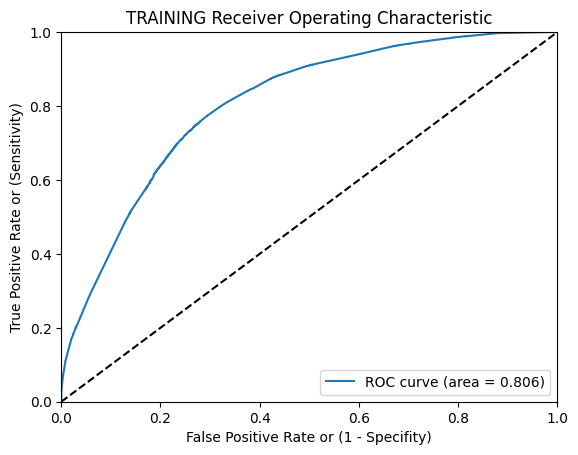



TESTING METRICS

    Test Confusion Matrix:
    [[2661 1332]
 [ 989 3593]]

    Test Report:
                  precision    recall  f1-score   support

           0       0.73      0.67      0.70      3993
           1       0.73      0.78      0.76      4582

    accuracy                           0.73      8575
   macro avg       0.73      0.73      0.73      8575
weighted avg       0.73      0.73      0.73      8575

    



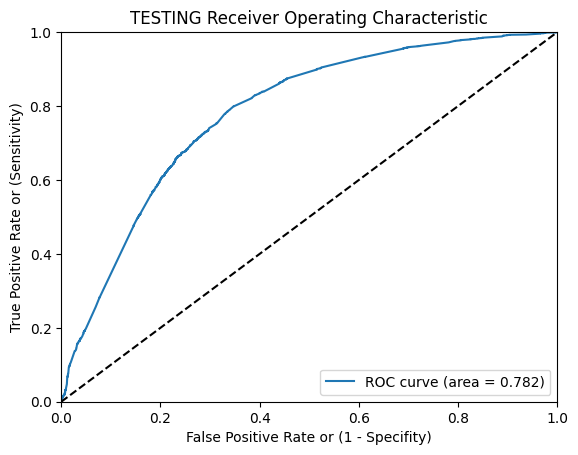

In [ ]:
doClassification_NN(nn4, X_train_scaled, X_test_scaled, y_train, y_test)

In [ ]:
# Export our model to HDF5 file
nn4.save("nn4.h5")

TRAINING METRICS

    Train Confusion Matrix:
    [[ 8556  3489]
 [ 2809 10870]]

    Train Report:
                  precision    recall  f1-score   support

           0       0.75      0.71      0.73     12045
           1       0.76      0.79      0.78     13679

    accuracy                           0.76     25724
   macro avg       0.75      0.75      0.75     25724
weighted avg       0.76      0.76      0.75     25724

    



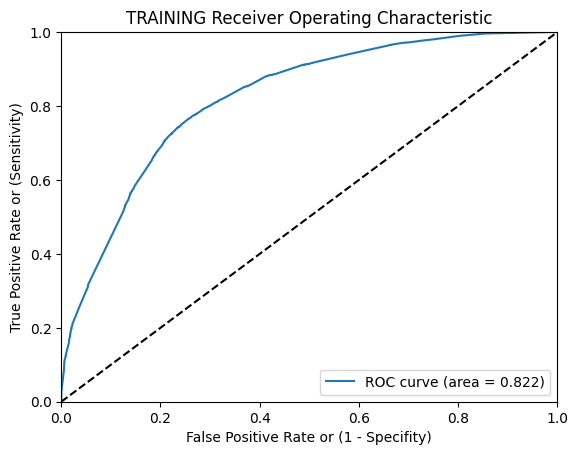



TESTING METRICS

    Test Confusion Matrix:
    [[2699 1294]
 [1075 3507]]

    Test Report:
                  precision    recall  f1-score   support

           0       0.72      0.68      0.69      3993
           1       0.73      0.77      0.75      4582

    accuracy                           0.72      8575
   macro avg       0.72      0.72      0.72      8575
weighted avg       0.72      0.72      0.72      8575

    



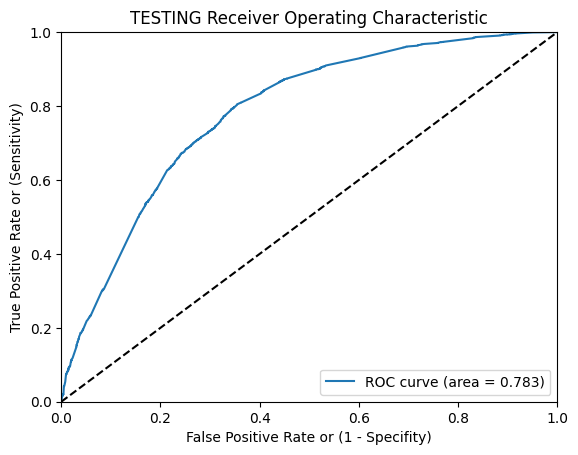

In [ ]:
# initialize
xgb = XGBClassifier(random_state=42)

# fit
xgb.fit(X_train_scaled, y_train)

doClassification(xgb, X_train_scaled, X_test_scaled, y_train, y_test)

In [ ]:
df.NAME.value_counts()[0:30]

PARENT BOOSTER USA INC                                                1260
TOPS CLUB INC                                                          765
UNITED STATES BOWLING CONGRESS INC                                     700
WASHINGTON STATE UNIVERSITY                                            492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                        408
PTA TEXAS CONGRESS                                                     368
SOROPTIMIST INTERNATIONAL OF THE AMERICAS INC                          331
ALPHA PHI SIGMA                                                        313
TOASTMASTERS INTERNATIONAL                                             293
MOST WORSHIPFUL STRINGER FREE AND ACCEPTED MASONS                      287
LITTLE LEAGUE BASEBALL INC                                             277
INTERNATIONAL ASSOCIATION OF LIONS CLUBS                               266
MOMS CLUB                                                              210
INTERNATIONAL ASSOCIATION

In [ ]:
df3 = df2.copy()
df3["NAME"] = df['NAME']

# Choose a cutoff value and create a list of NAME to be replaced
# use the variable name `names_to_replace`
names_to_replace = list(df3['NAME'].value_counts().loc[df3['NAME'].value_counts() < 200].index)

# Replace in dataframe
for cls in names_to_replace:
    df3['NAME'] = df3['NAME'].replace(cls,"Other")

# Check to make sure binning was successful
df3['NAME'].value_counts()

Other                                                                 28123
PARENT BOOSTER USA INC                                                 1260
TOPS CLUB INC                                                           765
UNITED STATES BOWLING CONGRESS INC                                      700
WASHINGTON STATE UNIVERSITY                                             492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                         408
PTA TEXAS CONGRESS                                                      368
SOROPTIMIST INTERNATIONAL OF THE AMERICAS INC                           331
ALPHA PHI SIGMA                                                         313
TOASTMASTERS INTERNATIONAL                                              293
MOST WORSHIPFUL STRINGER FREE AND ACCEPTED MASONS                       287
LITTLE LEAGUE BASEBALL INC                                              277
INTERNATIONAL ASSOCIATION OF LIONS CLUBS                                266
MOMS CLUB   

In [ ]:
df3 = pd.get_dummies(df3)

# Split our preprocessed data into our features and target arrays
X = df3.drop("IS_SUCCESSFUL", axis=1)
y = df3.IS_SUCCESSFUL

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)

print(X_train.shape)
print(X_test.shape)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

(25724, 59)
(8575, 59)


In [ ]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

nn5 = tf.keras.models.Sequential()

# Add our first Dense layer, including the input layer
nn5.add(tf.keras.layers.Dense(units=15, activation="relu", input_dim=len(X.columns))) # we have 44 features

# Add a second layer
nn5.add(tf.keras.layers.Dense(units=7, activation="relu"))

nn5.add(tf.keras.layers.Dense(units=5, activation="relu"))

# Add the output layer that uses a probability activation function
nn5.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the Sequential model
nn5.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 15)                900       
                                                                 
 dense_24 (Dense)            (None, 7)                 112       
                                                                 
 dense_25 (Dense)            (None, 5)                 40        
                                                                 
 dense_26 (Dense)            (None, 1)                 6         
                                                                 
Total params: 1058 (4.13 KB)
Trainable params: 1058 (4.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compile the Sequential model together and customize metrics
nn5.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
fit_model = nn5.fit(X_train_scaled, y_train, epochs=500)

Epoch 1/500
804/804 [==============================] - 7s 5ms/step - loss: 0.5719 - accuracy: 0.7065
Epoch 2/500
804/804 [==============================] - 4s 5ms/step - loss: 0.5170 - accuracy: 0.7441
Epoch 3/500
804/804 [==============================] - 2s 2ms/step - loss: 0.5109 - accuracy: 0.7480
Epoch 4/500
804/804 [==============================] - 2s 2ms/step - loss: 0.5079 - accuracy: 0.7496
Epoch 5/500
804/804 [==============================] - 2s 3ms/step - loss: 0.5058 - accuracy: 0.7511
Epoch 6/500
804/804 [==============================] - 2s 3ms/step - loss: 0.5044 - accuracy: 0.7521
Epoch 7/500
804/804 [==============================] - 2s 2ms/step - loss: 0.5032 - accuracy: 0.7524
Epoch 8/500
804/804 [==============================] - 2s 2ms/step - loss: 0.5022 - accuracy: 0.7531
Epoch 9/500
804/804 [==============================] - 2s 2ms/step - loss: 0.5014 - accuracy: 0.7539
Epoch 10/500
804/804 [==============================] - 2s 2ms/step - loss: 0.5003 - accura

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn5.evaluate(X_test_scaled, y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5095 - accuracy: 0.7448 - 714ms/epoch - 3ms/step
Loss: 0.509521484375, Accuracy: 0.7448396682739258


268/268 [==============================] - 0s 1ms/step
TRAINING METRICS

    Train Confusion Matrix:
    [[ 7897  4148]
 [ 2098 11581]]

    Train Report:
                  precision    recall  f1-score   support

           0       0.79      0.66      0.72     12045
           1       0.74      0.85      0.79     13679

    accuracy                           0.76     25724
   macro avg       0.76      0.75      0.75     25724
weighted avg       0.76      0.76      0.75     25724

    



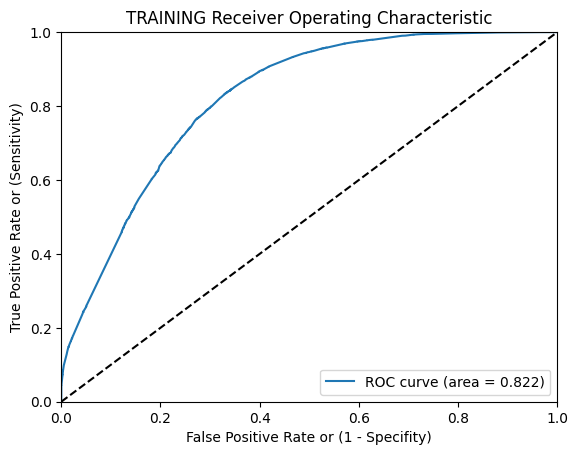



TESTING METRICS

    Test Confusion Matrix:
    [[2572 1421]
 [ 767 3815]]

    Test Report:
                  precision    recall  f1-score   support

           0       0.77      0.64      0.70      3993
           1       0.73      0.83      0.78      4582

    accuracy                           0.74      8575
   macro avg       0.75      0.74      0.74      8575
weighted avg       0.75      0.74      0.74      8575

    



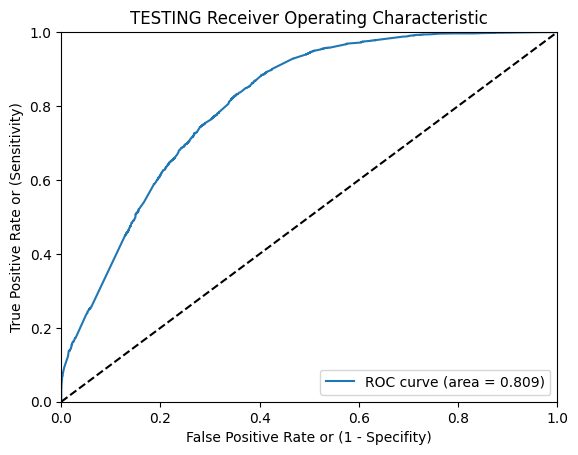

In [ ]:
doClassification_NN(nn5, X_train_scaled, X_test_scaled, y_train, y_test)

TRAINING METRICS

    Train Confusion Matrix:
    [[ 8195  3850]
 [ 2020 11659]]

    Train Report:
                  precision    recall  f1-score   support

           0       0.80      0.68      0.74     12045
           1       0.75      0.85      0.80     13679

    accuracy                           0.77     25724
   macro avg       0.78      0.77      0.77     25724
weighted avg       0.78      0.77      0.77     25724

    



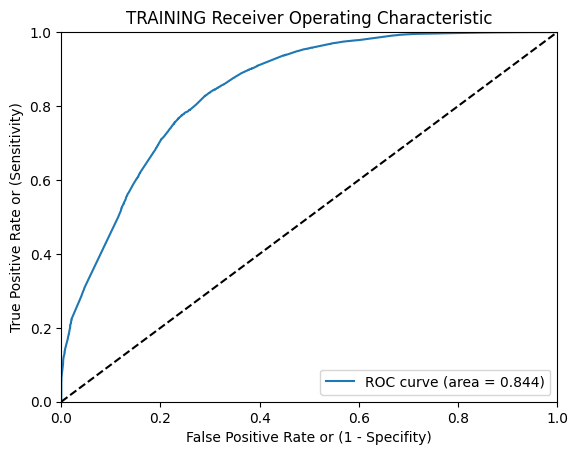



TESTING METRICS

    Test Confusion Matrix:
    [[2580 1413]
 [ 787 3795]]

    Test Report:
                  precision    recall  f1-score   support

           0       0.77      0.65      0.70      3993
           1       0.73      0.83      0.78      4582

    accuracy                           0.74      8575
   macro avg       0.75      0.74      0.74      8575
weighted avg       0.75      0.74      0.74      8575

    



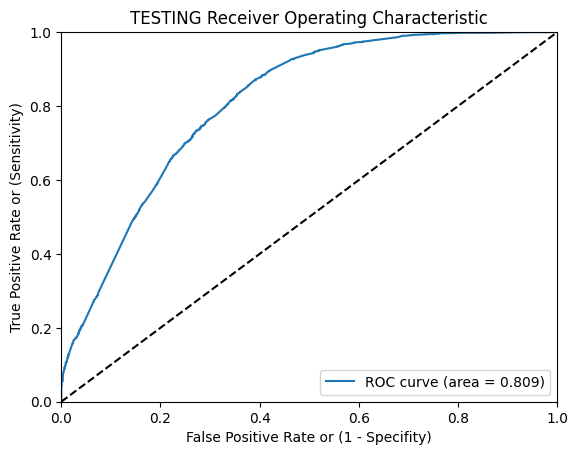

In [ ]:
# initialize
xgb = XGBClassifier(random_state=42)

# fit
xgb.fit(X_train_scaled, y_train)

doClassification(xgb, X_train_scaled, X_test_scaled, y_train, y_test)

In [ ]:
# Export our model to HDF5 file
nn5.save("nn5.h5")